# Analysis and Visualization of Complex Agro-Environmental Data
---
## Non-parametric hypothesis testing

Here, some examples of application of the most commonly used non-parametric methods are shown, using simulated data.

##### Import modules:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt


##### Simulate populations (N = 100000)

In [2]:
# seed the random number generator
np.random.seed(24)
# generate univariate observations
pop1 = np.random.exponential(50,100000)
pop2 = np.random.normal(50,25,100000)
pop3 = np.random.exponential(50, 100000)
pop4 = np.random.exponential(100, 100000)

In [3]:
med1, med2 = np.median(pop1), np.median(pop2)
print(med1, med2)

34.55117263944456 49.888381292948935


### Non-parametric two-sample tests
#### Kolmogorov-smirnov test

This is a very particular type of non-parametric hypothesis testing which is based on the difference between two Empirical Cumulative Distribution Funtion (ECDF), and can be used as a single sample test to check if a given sample follows some specific theoretical distribution (e.g. normal) or to test if two samples are drawn from populations with equal probability distributions.

1. Define H0 : The two samples are drawn from populations with equal distributions
2. Take sample from populations pop1 and pop2 - use the same as previous example
3. Check assumptions (e.g. test for homeogeneity used in the parametric hypothesis testing examples)
3. Compute the statistic and check *p-value*

In [4]:
# Take random samples from data (n=30)
np.random.seed(123)
sample1 = np.random.choice(pop1, 30)
sample2 = np.random.choice(pop2, 30)

Using raincloud plots to compare samples

Install the module 'ptitprince' that facilitates the plotting: `pip install ptitprince`

Reference: https://wellcomeopenresearch.org/articles/4-63

github: https://github.com/RainCloudPlots/RainCloudPlots.git

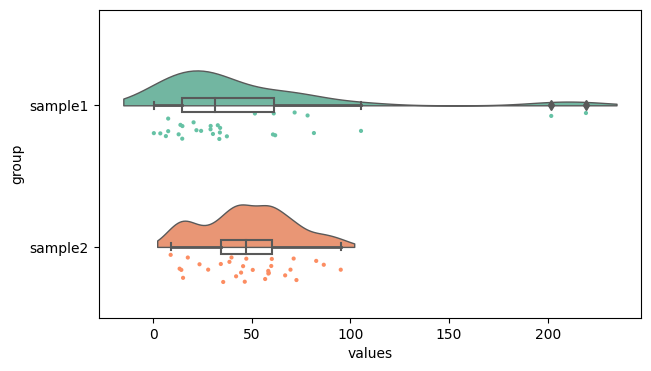

In [14]:
# Import the module
import ptitprince as pt

# Convert samples to a DataFrame with a grouping column:
df = pd.DataFrame({'group': np.repeat(['sample1', 'sample2'], 30),
                   'values': np.concatenate((sample1, sample2))})

# run raincloud plots
plt.figure(figsize = (7,4))
pt.RainCloud(x = 'group', y = 'values', data=df, palette = "Set2", bw = .3,cut=1,
                 width_viol = .6, width_box = 0.1, orient = "h", move = 0.15, offset=0) # mov - moves the rain below the boxplot

plt.show()

In [15]:
# Compute the test
stat, p = sts.ks_2samp(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=0.400, p-value=0.016
reject H0 with an error probability <0.05)


#### Mann-Whitney U Test (or Wilcoxon rank sum test) - two-tailed test

This is a rank-based hyporthesis testing that compares the sum of ranks between two samples to infer differences in the central tendency (in this case it is interpreted as comparing medians).

H0 : The two samples are drawn from populations with equal medians

In [16]:
# compute the medians
med1, med2 = np.median(sample1), np.median(sample2)
print('median of sample 1 = %.3f' % med1)
print('median of sample 2 = %.3f' % med2)
# Compute the test
stat, p = sts.mannwhitneyu(sample1, sample2, alternative='two-sided')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

median of sample 1 = 31.504
median of sample 2 = 46.796
stat=339.000, p-value=0.102
fail to reject H0. Rejecting H0 has an error probability >0.05


#### Mann-Whitney U Test (or Wilcoxon rank sum test) - one-tailed test

H0 : Population 1 has a median > or = to Population 2

In [17]:
# compute the medians
med1, med2 = np.median(sample1), np.median(sample2)
print('median of sample 1 = %.3f' % med1)
print('median of sample 2 = %.3f' % med2)
# Compute the test
stat, p = sts.mannwhitneyu(sample2, sample1, alternative='greater')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

median of sample 1 = 31.504
median of sample 2 = 46.796
stat=561.000, p-value=0.051
fail to reject H0. Rejecting H0 has an error probability >0.05


#### Wilcoxon signed rank test (paired)

This is similar to the former method but assuming that observations between groups are matched (e.g. two measures taken in the same locations).

H0 : The two samples are drawn from populations with equal medians

In [18]:
stat, p = sts.wilcoxon(sample1, sample2)
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

stat=160.000, p-value=0.140
fail to reject H0. Rejecting H0 has an error probability >0.05


### Non-parametric multiple sample tests
#### Kruskal-Wallis test

This is the non-parametric equivalent to the ANOVA and it is also based on the sum of ranks.

1. Define H0 : The samples are drawn from populations with equal medians
2. Take sample from populations (pop1 and pop2)

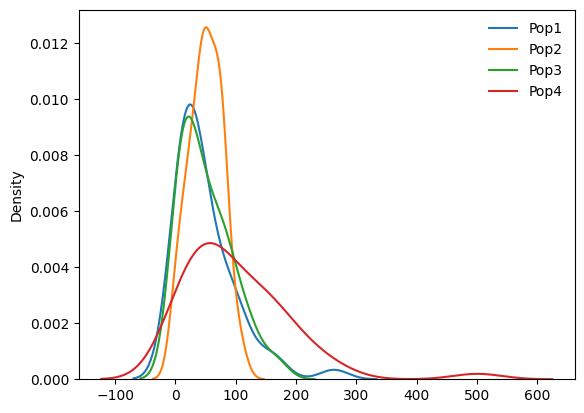

In [19]:
# Take random samples from data (n=20)

np.random.seed(24)
sample1 = np.random.choice(list(pop1), 50)
sample2 = np.random.choice(list(pop2), 50)
sample3 = np.random.choice(list(pop3), 50)
sample4 = np.random.choice(list(pop4), 50)
sns.kdeplot(sample1, label='Pop1')
sns.kdeplot(sample2, label='Pop2')
sns.kdeplot(sample3, label='Pop3')
sns.kdeplot(sample4, label='Pop4')
plt.legend(frameon=False, loc='upper right')


3. Compute the statistic and check the *p-value*

In [20]:
# compute the medians
med1, med2, med3, med4 = np.median(sample1), np.median(sample2), np.median(sample3), np.median(sample4)
print('median of sample 1 = %.3f' % med1)
print('median of sample 2 = %.3f' % med2)
print('median of sample 3 = %.3f' % med3)
print('median of sample 4 = %.3f' % med4)
# Compute the test
stat, p = sts.kruskal(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

median of sample 1 = 32.031
median of sample 2 = 48.362
median of sample 3 = 40.985
median of sample 4 = 78.377
F-statistics=16.354, p=0.000959
reject H0 with an error probability <0.05)


#### Dunn's test (multiple comparisons)

The Dunn's test is a non-parametric multiple comparison test to check which pairs of groups differ when a Kruskal-wallis test (or Friedman test) rejects the null hypothesis. It is implemented in the scikit-posthocs module (you may need to install: run `pip install scikit-posthocs` in the CLI terminal).

H0 : The samples are drawn from populations with equal medians

In [21]:
# need a list with samples
list_sample = [sample1, sample2, sample2, sample4]
sp.posthoc_dunn(list_sample, p_adjust = 'bonferroni') # the correction for multiple comparisons is based on the bonferroni's correction.
# the output is a matrix of p-values for each pair of groups.

,1,2,3,4
1,1.0000,1.000000,1.000000,0.000700
2,1.0000,1.000000,1.000000,0.024642
3,1.0000,1.000000,1.000000,0.024642
4,0.0007,0.024642,0.024642,1.000000


#### Friedman test

This is the non-parametric equivalent of a repeated measures ANOVA. It is implemented in statsmodels. 

H0 : The samples are drawn from populations with equal medians

In [22]:
# Create data - Ex: Measurements (crop production) taken in two times for three experimental plots with different treatments

# Take random samples from sample1 (n=30)

plot = np.repeat([1, 2, 3], 30)

time = np.concatenate((np.repeat([1, 2], 15), np.repeat([1, 2], 15), np.repeat([1, 2], 15)))

np.random.seed(123)
time1 = np.random.choice(pop1, 30)
time2 = np.random.choice(pop1, 30)
time3 = np.random.choice(pop1, 30)
values = np.concatenate((time1, time2, time3))

df3 = pd.DataFrame({'plot': plot,
                   'time': time,
                   'crop_production': values})
df3

,plot,time,crop_production
0,1,1,21.900839
1,1,1,7.572759
2,1,1,61.826996
3,1,1,32.734805
4,1,1,37.340648
...,...,...,...
85,3,2,29.971273
86,3,2,34.918700
87,3,2,20.696783
88,3,2,21.655782


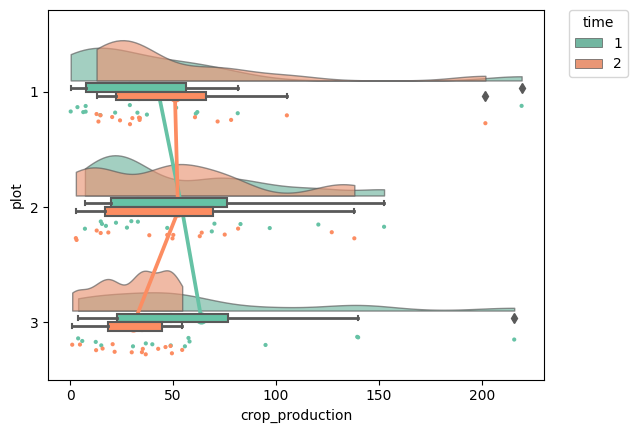

In [23]:
# Raincloud plot
ax=pt.RainCloud(x = 'plot', y = 'crop_production', hue = 'time', data = df3, palette = 'Set2', bw = .3, width_viol = .7,
                orient = "h" , alpha = .65, dodge = True, pointplot = True, move = .2, offset=0.1)

In [24]:
stat, p = sts.friedmanchisquare(df3['crop_production'][0:30], 
                                df3['crop_production'][30:60], 
                                df3['crop_production'][60:90])
print('Statistic=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistic=2.400, p=0.301194
fail to reject H0. Rejecting H0 has an error probability >0.05


### Tests for categorical variables

#### Chi-Square Test of Independence

A Chi-Square Test of Independence is used to determine whether or not there is a significant association between two categorical variables.

H0: The two variables are independent.

In [27]:
# Create data contingency table (counts for each class combination of two categorical variables, 
# for ex: treatment in columns (5 treatments) vs. success of treatment (success/unsuccess) in rows)
data = [[30, 90, 50, 60, 10],
        [70, 10, 50, 40, 90]]

In [ ]:
# Using an aluvial (or Sankey) diagram to visualize a contingency table
# check more here: https://plotly.com/python/sankey-diagram/

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 20,thickness = 20, line = dict(color = "black", width = 0.5), 
    label = ["Treatment 1", "Treatment 2", "Treatment 3", "Treatment 4", "Treatment 5", "Success", "Unsuccess"],
    color = ['#a6cee3','#fdbf6f','#fb9a99', '#79c167', '#c478a9', '#789dc4', '#d95f59']
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], # indices correspond to source node wrt to label 
      target = [5, 6, 5, 6, 5, 6, 5, 6, 5, 6],
      value = [30, 70, 90, 10, 50, 50, 60, 40, 10, 90],
      color = ['#a6cee3', '#a6cee3', '#fdbf6f', '#fdbf6f','#fb9a99', '#fb9a99', '#79c167', '#79c167', '#c478a9', '#c478a9']
  ))])

# set figure size and aspect ration
fig.update_layout(
    autosize=False,
    width=700,
    height=600,
)

fig.show()

In [30]:
# run test
stat, p, df, expected_freq = sts.chi2_contingency(data)
print('Statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')

Statistics=0.000, p=1.000000
fail to reject H0. Rejecting H0 has an error probability >0.05


This means that the success is dependent on the treatment.

Imagine the treatment was success was totally independent from the treatment:

In [ ]:
data = [[30, 30, 30, 30, 30],
        [30, 30, 30, 30, 30]]

In [33]:
# Using an aluvial (or Sankey) diagram to visualize a contingency table
# check more here: https://plotly.com/python/sankey-diagram/

import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(pad = 20,thickness = 20, line = dict(color = "black", width = 0.5), 
    label = ["Treatment 1", "Treatment 2", "Treatment 3", "Treatment 4", "Treatment 5", "Success", "Unsuccess"],
    color = ['#a6cee3','#fdbf6f','#fb9a99', '#79c167', '#c478a9', '#789dc4', '#d95f59']
    ),
    link = dict(
      source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], # indices correspond to source node wrt to label 
      target = [5, 6, 5, 6, 5, 6, 5, 6, 5, 6],
      value = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
      color = ['#a6cee3', '#a6cee3', '#fdbf6f', '#fdbf6f','#fb9a99', '#fb9a99', '#79c167', '#79c167', '#c478a9', '#c478a9']
  ))])

# set figure size and aspect ration
fig.update_layout(
    autosize=False,
    width=700,
    height=600,
)

fig.show()

In [ ]:
# run test
stat, p, df, expected_freq = sts.chi2_contingency(data)
print('Statistics=%.3f, p=%.6f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')